In [32]:
df = pd.read_csv(
    r"data/amazon_sale_report.csv",
    engine='python',
    on_bad_lines='skip'
)


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    r"C:\Users\jagnn\Downloads\data_analyst_project\amazon_sale_report.csv",
    engine='python',
    on_bad_lines='skip'
)


In [7]:
print("Missing values per column:\n", df.isna().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:
 index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status          98
Qty                      0
currency               183
Amount                 183
ship-city                2
ship-state               2
ship-postal-code         2
ship-country             2
promotion-ids          830
B2B                      0
fulfilled-by          1821
Unnamed: 22           2326
dtype: int64

Number of duplicate rows: 0


In [33]:
df.fillna(np.nan, inplace=True)


In [34]:
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')


C:\Users\jagnn\AppData\Local\Temp\ipykernel_6912\2200860371.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [35]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.lower().str.replace(' ', '')


In [36]:
date_col = 'order_date'  # Change this to your date column name
if date_col in df.columns:
    df['order_month'] = df[date_col].dt.month
    df['order_weekday'] = df[date_col].dt.day_name()


In [37]:
print(df.head())


   index             Order ID       Date                    Status Fulfilment  \
0      0  405-8078784-5731545 2022-04-30                 cancelled   merchant   
1      1  171-9198151-1101146 2022-04-30  shipped-deliveredtobuyer   merchant   
2      2  404-0687676-7273146 2022-04-30                   shipped     amazon   
3      3  403-9615377-8133951 2022-04-30                 cancelled   merchant   
4      4  407-1069790-7240320 2022-04-30                   shipped     amazon   

  Sales Channel  ship-service-level    Style              SKU      Category  \
0      amazon.in           standard   set389   set389-kr-np-s           set   
1      amazon.in           standard  jne3781  jne3781-kr-xxxl         kurta   
2      amazon.in          expedited  jne3371    jne3371-kr-xl         kurta   
3      amazon.in           standard    j0341       j0341-dr-l  westerndress   
4      amazon.in          expedited  jne3671  jne3671-tu-xxxl           top   

   ... currency  Amount   ship-city   

In [38]:
# Descriptive statistics for numerical columns
df.describe()


,index,Date,Qty,Amount,ship-postal-code,Unnamed: 22
count,2326.000000,2326,2326.000000,2143.000000,2324.000000,0.0
mean,1162.500000,2022-04-29 15:16:52.209802240,0.898538,625.480439,473316.275387,NaN
min,0.000000,2022-04-29 00:00:00,0.000000,0.000000,110002.000000,NaN
25%,581.250000,2022-04-29 00:00:00,1.000000,432.000000,390008.750000,NaN
50%,1162.500000,2022-04-30 00:00:00,1.000000,582.000000,500043.000000,NaN
75%,1743.750000,2022-04-30 00:00:00,1.000000,759.000000,600073.250000,NaN
max,2325.000000,2022-04-30 00:00:00,15.000000,2224.000000,855115.000000,NaN
std,671.602685,NaN,0.436040,274.611591,193906.936092,NaN


In [39]:
# Correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


                     index       Qty    Amount  ship-postal-code       B2B  \
index             1.000000 -0.024194 -0.026242         -0.018477  0.014271   
Qty              -0.024194  1.000000  0.031080          0.021975  0.005361   
Amount           -0.026242  0.031080  1.000000         -0.033032 -0.008192   
ship-postal-code -0.018477  0.021975 -0.033032          1.000000 -0.021699   
B2B               0.014271  0.005361 -0.008192         -0.021699  1.000000   
Unnamed: 22            NaN       NaN       NaN               NaN       NaN   

                  Unnamed: 22  
index                     NaN  
Qty                       NaN  
Amount                    NaN  
ship-postal-code          NaN  
B2B                       NaN  
Unnamed: 22               NaN  


In [40]:
# Correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


                     index       Qty    Amount  ship-postal-code       B2B  \
index             1.000000 -0.024194 -0.026242         -0.018477  0.014271   
Qty              -0.024194  1.000000  0.031080          0.021975  0.005361   
Amount           -0.026242  0.031080  1.000000         -0.033032 -0.008192   
ship-postal-code -0.018477  0.021975 -0.033032          1.000000 -0.021699   
B2B               0.014271  0.005361 -0.008192         -0.021699  1.000000   
Unnamed: 22            NaN       NaN       NaN               NaN       NaN   

                  Unnamed: 22  
index                     NaN  
Qty                       NaN  
Amount                    NaN  
ship-postal-code          NaN  
B2B                       NaN  
Unnamed: 22               NaN  


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
print(df.columns.tolist())


['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [43]:
#task 2 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


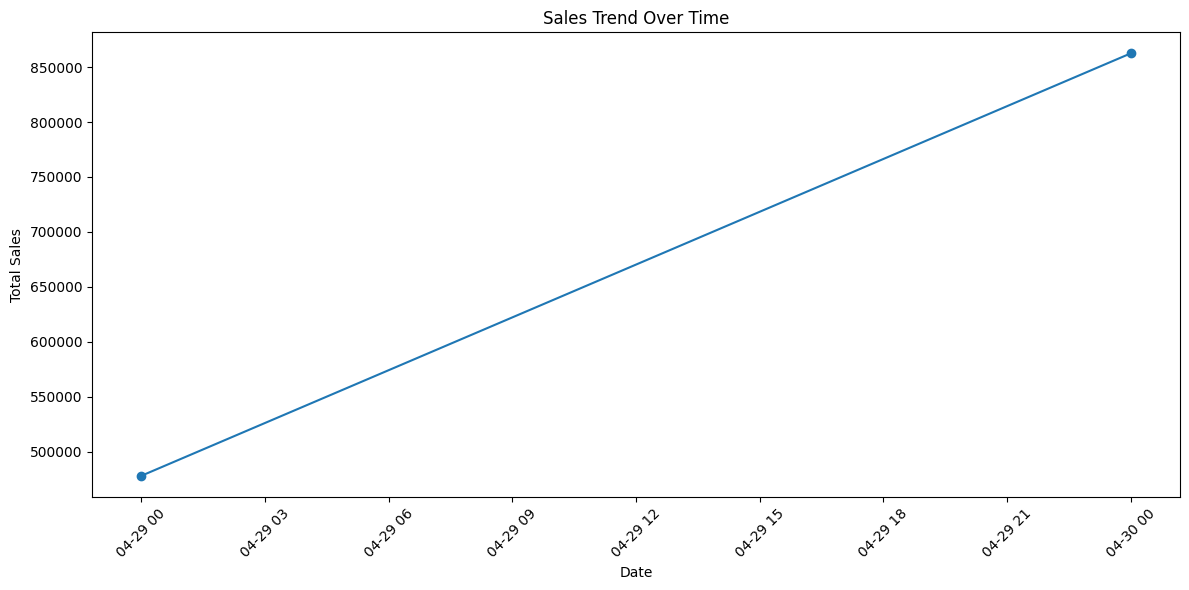

In [44]:
df_grouped = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(df_grouped['Date'], df_grouped['Amount'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jagnn\AppData\Local\Temp\ipykernel_6912\135442986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


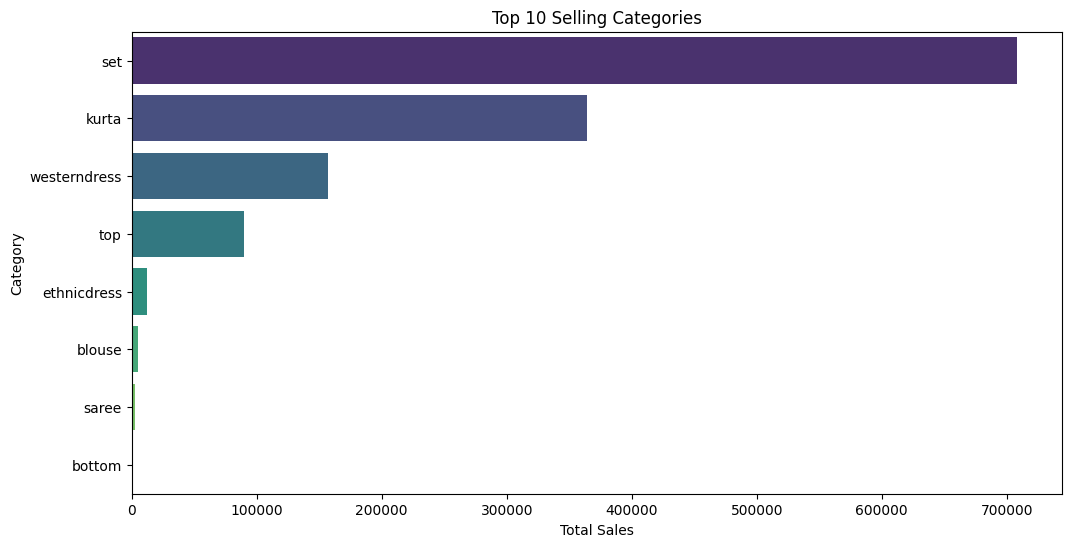

In [45]:
top_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Categories')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()


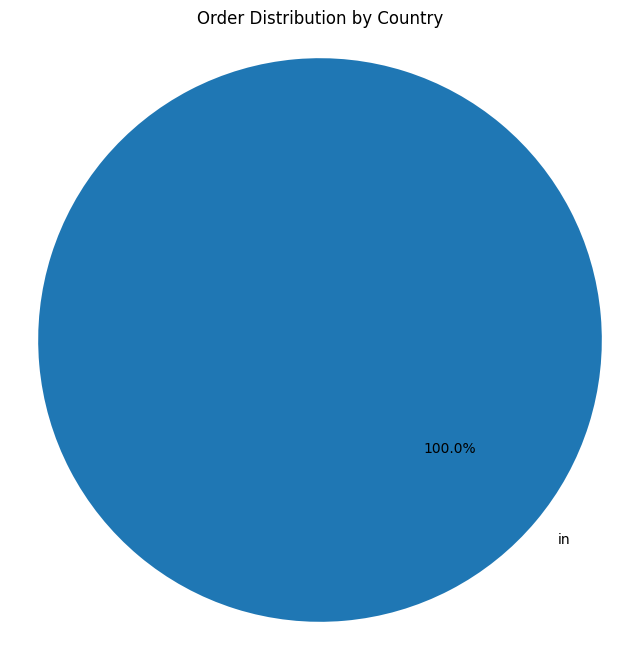

In [46]:
country_counts = df['ship-country'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Distribution by Country')
plt.axis('equal')
plt.show()


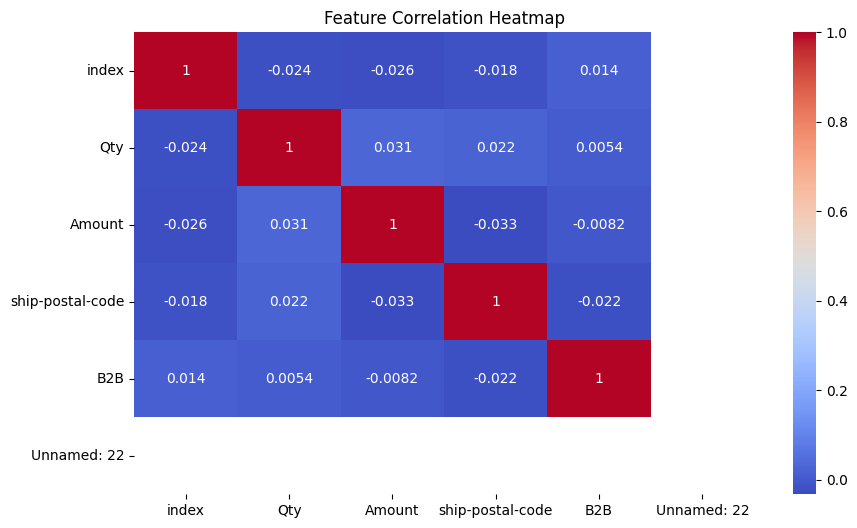

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()


In [48]:
#task 4
total_revenue = df['Amount'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 1340404.58


In [49]:
total_orders = df['Order ID'].nunique()
print("Total Orders:", total_orders)


Total Orders: 2197


In [50]:
aov = total_revenue / total_orders
print("Average Order Value (AOV):", aov)


Average Order Value (AOV): 610.1067728720983


In [51]:
city_revenue = df.groupby('ship-city')['Amount'].sum()
most_profitable_city = city_revenue.idxmax()
print("Most Profitable City:", most_profitable_city)
print("Revenue from Most Profitable City:", city_revenue.max())


Most Profitable City: hyderabad
Revenue from Most Profitable City: 106814.24


In [52]:
# Repeat customer rate can't be calculated accurately without customer identifier.
print("Repeat Customer Rate: Cannot calculate — 'Customer ID' not present in dataset.")


Repeat Customer Rate: Cannot calculate — 'Customer ID' not present in dataset.


In [53]:
from IPython.display import Markdown

Markdown(f"""
### 📊 Business Insights Summary

- **Total Revenue:** ₹{total_revenue:,.2f}
- **Total Orders:** {total_orders:,}
- **Average Order Value (AOV):** ₹{aov:,.2f}
- **Most Profitable City:** {most_profitable_city} (₹{city_revenue.max():,.2f})
- **Repeat Customer Rate:** *Not available* — Customer ID field missing.

---

### 🔍 Observations:
- AOV gives insight into how much customers typically spend per order.
- Knowing the most profitable city helps target regional marketing strategies.
- To calculate **repeat customer rate**, a unique customer identifier is required (e.g., email or customer ID).
""")



### 📊 Business Insights Summary

- **Total Revenue:** ₹1,340,404.58
- **Total Orders:** 2,197
- **Average Order Value (AOV):** ₹610.11
- **Most Profitable City:** hyderabad (₹106,814.24)
- **Repeat Customer Rate:** *Not available* — Customer ID field missing.

---

### 🔍 Observations:
- AOV gives insight into how much customers typically spend per order.
- Knowing the most profitable city helps target regional marketing strategies.
- To calculate **repeat customer rate**, a unique customer identifier is required (e.g., email or customer ID).
